In [0]:
## mnist classfification with tnsorflow
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
import tensorflow as tf

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


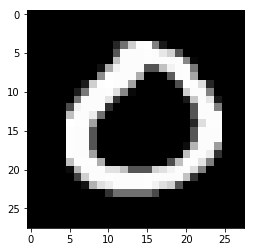

In [0]:
##
batch_xs,batch_ys = mnist.train.next_batch(1)
X = batch_xs
X = X.reshape([28,28])
plt.gray()
print(batch_ys)
plt.imshow(X)

In [0]:
## applying regression model in the mnist datasets
## create the placeholder

## ans by the teacher
  #[None,748] => infinite number of images with 28*28 pixels
  #[748,10] => mapping to 10 different classes (digit labels)
  
  
##
x = tf.placeholder(tf.float32,[None,784])
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
## placeholder wight and bias

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
y = tf.nn.softmax(tf.matmul(x,w)+b)

In [0]:
## place holdeer for actual value 
y_ =  tf.placeholder(tf.float32,[None,10]) ## beacause of the hot encoding this size is 10

In [0]:
loss = tf.reduce_mean(-tf.reduce_mean(y_ * tf.log(y)))

In [0]:
train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [0]:
## first seeing the session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [0]:
for _ in range(1000):   ##epoch
  batch_xs,batch_ys = mnist.train.next_batch(100) ## we take 100 photos for each batch
  sess.run(train,feed_dict={x:batch_xs,y_:batch_ys})

In [0]:
## made a model for the accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [0]:
## run the whole test data set in the equation
print (sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.9012
